# network_analysis.py checker
First, import relevant libraries:

In [1]:
import os
import sys

sys.path.append('../../src/')
from utils.database import dbutils
from features.network_analysis import *

In [2]:
conn = dbutils.connect()
cursor = conn.cursor()

Then, load the data (takes a few moments):

In [3]:
nodes = pd.read_sql('select * from optourism.firenze_card_locations', con=conn)
nodes.head()

,museum_name,longitude,latitude,museum_id,short_name,string
0,Basilica di Santa Croce,11.262598,43.768754,1,Santa Croce,C
1,Basilica San Lorenzo,11.254430,43.774932,2,San Lorenzo,2
2,Battistero di San Giovanni,11.254966,43.773131,3,Opera del Duomo,D
3,Biblioteca Medicea Laurenziana,11.253924,43.774799,4,Laurenziana,l
4,Cappella Brancacci,11.243859,43.768334,5,Brancacci,b


In [4]:
firenzedata = pd.read_sql('select * from optourism.firenze_card_logs', con=conn)
firenzedata.head()

,user_id,museum_name,entry_time,adults_first_use,adults_reuse,total_adults,minors,museum_id
0,2089098,Palazzo Pitti,2016-09-19 14:49:00,0,1,1,0,38
1,2089099,Palazzo Pitti,2016-09-19 14:49:00,0,1,1,0,38
2,2083344,Palazzo Pitti,2016-09-19 14:57:00,0,1,1,0,38
3,2083335,Palazzo Pitti,2016-09-19 14:57:00,0,1,1,0,38
4,2083304,Palazzo Pitti,2016-09-19 14:58:00,0,1,1,0,38


In [5]:
df = prepare_firenzedata(firenzedata, nodes)
df.head()
# firenzedata['date'] = pd.to_datetime(firenzedata['entry_time'],format='%Y-%m-%d %H:%M:%S').dt.date  # Convert the entry_time string to a datetime object

,user_id,museum_name,entry_time,adults_first_use,adults_reuse,total_adults,minors,museum_id,short_name,string,date,hour,total_people
0,2089098,Palazzo Pitti,2016-09-19 14:49:00,0,1,1,0,38,Pitti,P,2016-09-19,2016-09-19 14:00:00,1
1,2089099,Palazzo Pitti,2016-09-19 14:49:00,0,1,1,0,38,Pitti,P,2016-09-19,2016-09-19 14:00:00,1
2,2083344,Palazzo Pitti,2016-09-19 14:57:00,0,1,1,0,38,Pitti,P,2016-09-19,2016-09-19 14:00:00,1
3,2083335,Palazzo Pitti,2016-09-19 14:57:00,0,1,1,0,38,Pitti,P,2016-09-19,2016-09-19 14:00:00,1
4,2083304,Palazzo Pitti,2016-09-19 14:58:00,0,1,1,0,38,Pitti,P,2016-09-19,2016-09-19 14:00:00,1


In [6]:
edges = make_dynamic_firenze_card_edgelist(df)
edges.head()

,from,to,total_people,entry_time
0,start,Uffizi,1,2016-06-22 10:04:00
1,Uffizi,M. Casa Dante,1,2016-06-22 14:26:00
2,M. Casa Dante,Accademia,1,2016-06-22 15:49:00
3,start,Opera del Duomo,1,2016-06-23 09:43:00
4,Opera del Duomo,M. Galileo,1,2016-06-23 11:14:00


In [7]:
static = make_static_firenze_card_edgelist(edges)
static.head()

,from,to,weight
0,Accademia,Accademia,2
1,Accademia,Brancacci,77
2,Accademia,Cappelle Medicee,1277
3,Accademia,Casa Buonarroti,49
4,Accademia,La Specola,30


In [9]:
g = make_firenze_card_static_graph(static, nodes)
ig.summary(g)

In [20]:
# g = delete_paired_edges(g)
# ig.summary(g)

In [10]:
mat = make_origin_destination_matrix(g)
mat.head()

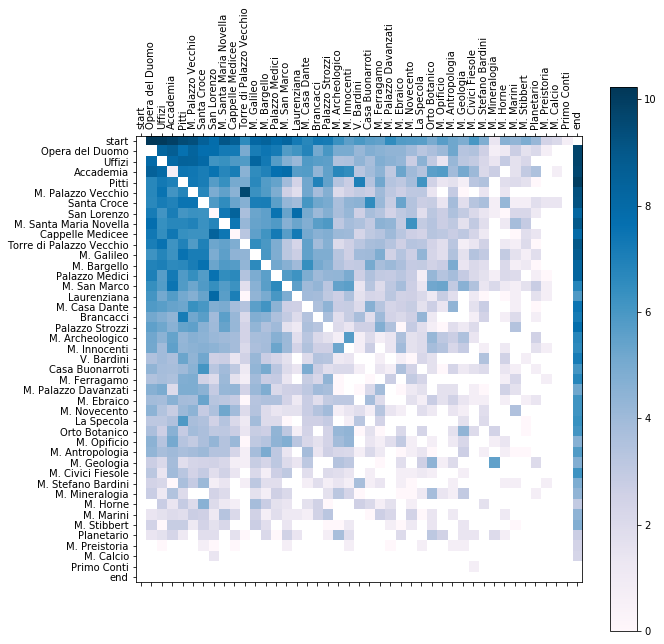

In [11]:
plot_origin_destination_matrix_heatmap(mat)

In [9]:
paths = make_firenze_card_daily_paths(df)
paths.head()

,0,1,2,3
user_id,,,,
1459702,U3A,DGVBC,NaN,NaN
1473903,U,D2V,PX,NaN
1473904,U,D2V,PX,NaN
1473905,N,cDAC,NaN,NaN
1473906,PSUV,AIMC2,cl,NaN


In [19]:
agg = aggregate_firenze_card_daily_paths(paths)
agg.head()

,frequency
daily_path,
D,5932
P,5643
U,5420
A,3604
V,1909


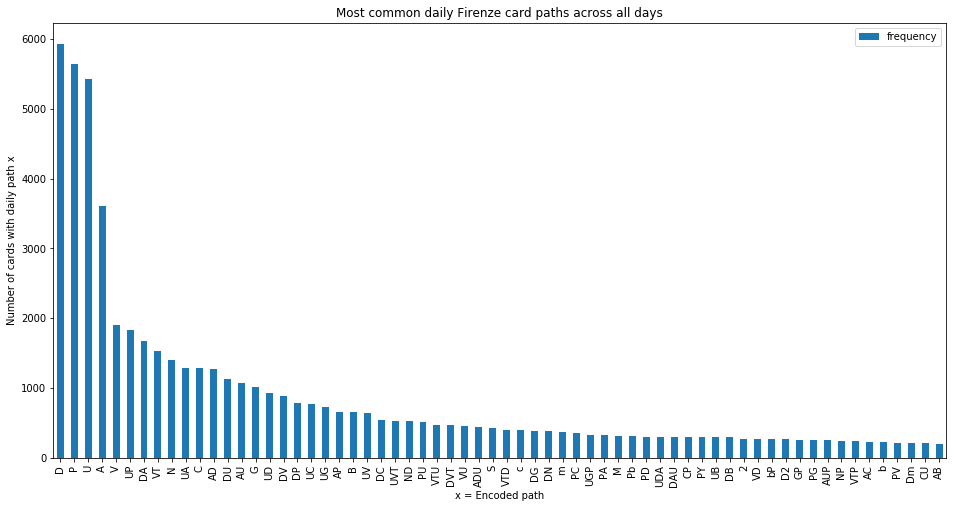

In [20]:
plot_aggregate_firenze_card_daily_paths(agg)

In [21]:
plot_firenze_card_static_graph(g)

In [12]:
# from_to_home = from_to_home_firenze_card_edges_generator(paths, nodes)

In [13]:
# from_to_home.reset_index(inplace=True)
# supp_edges = pd.DataFrame({'from': ['start'] * from_to_home.shape[0] + from_to_home['short_name'].tolist(),
#                            'to': from_to_home['short_name'].tolist() + ['end'] * from_to_home.shape[0],
#                            'weight': from_to_home['home_to_node'].tolist() + from_to_home['node_to_home'].tolist()})
# supp_edges.dropna(how='any', inplace=True)
# static2 = pd.concat([static, supp_edges])
# # static2 = static2[static2['from'] != 'source']

In [14]:
# static2[(static2['from']=='source')].sort_values('weight',ascending=False)

In [15]:
# static2[(static2['from']=='start')].sort_values('weight',ascending=False)

In [16]:
# static2 = add_home_node_firenze_card_static_edgelist(from_to_home, static)

In [17]:
df1 = fill_out_time_series(df,timeunitname='hour',timeunitcode='h',start_date='2016-06-01',end_date='2016-10-01')
df1.head()

,short_name,h,total_people
0,Pitti,2016-06-01 00:00:00,0
1,Pitti,2016-06-01 01:00:00,0
2,Pitti,2016-06-01 02:00:00,0
3,Pitti,2016-06-01 03:00:00,0
4,Pitti,2016-06-01 04:00:00,0


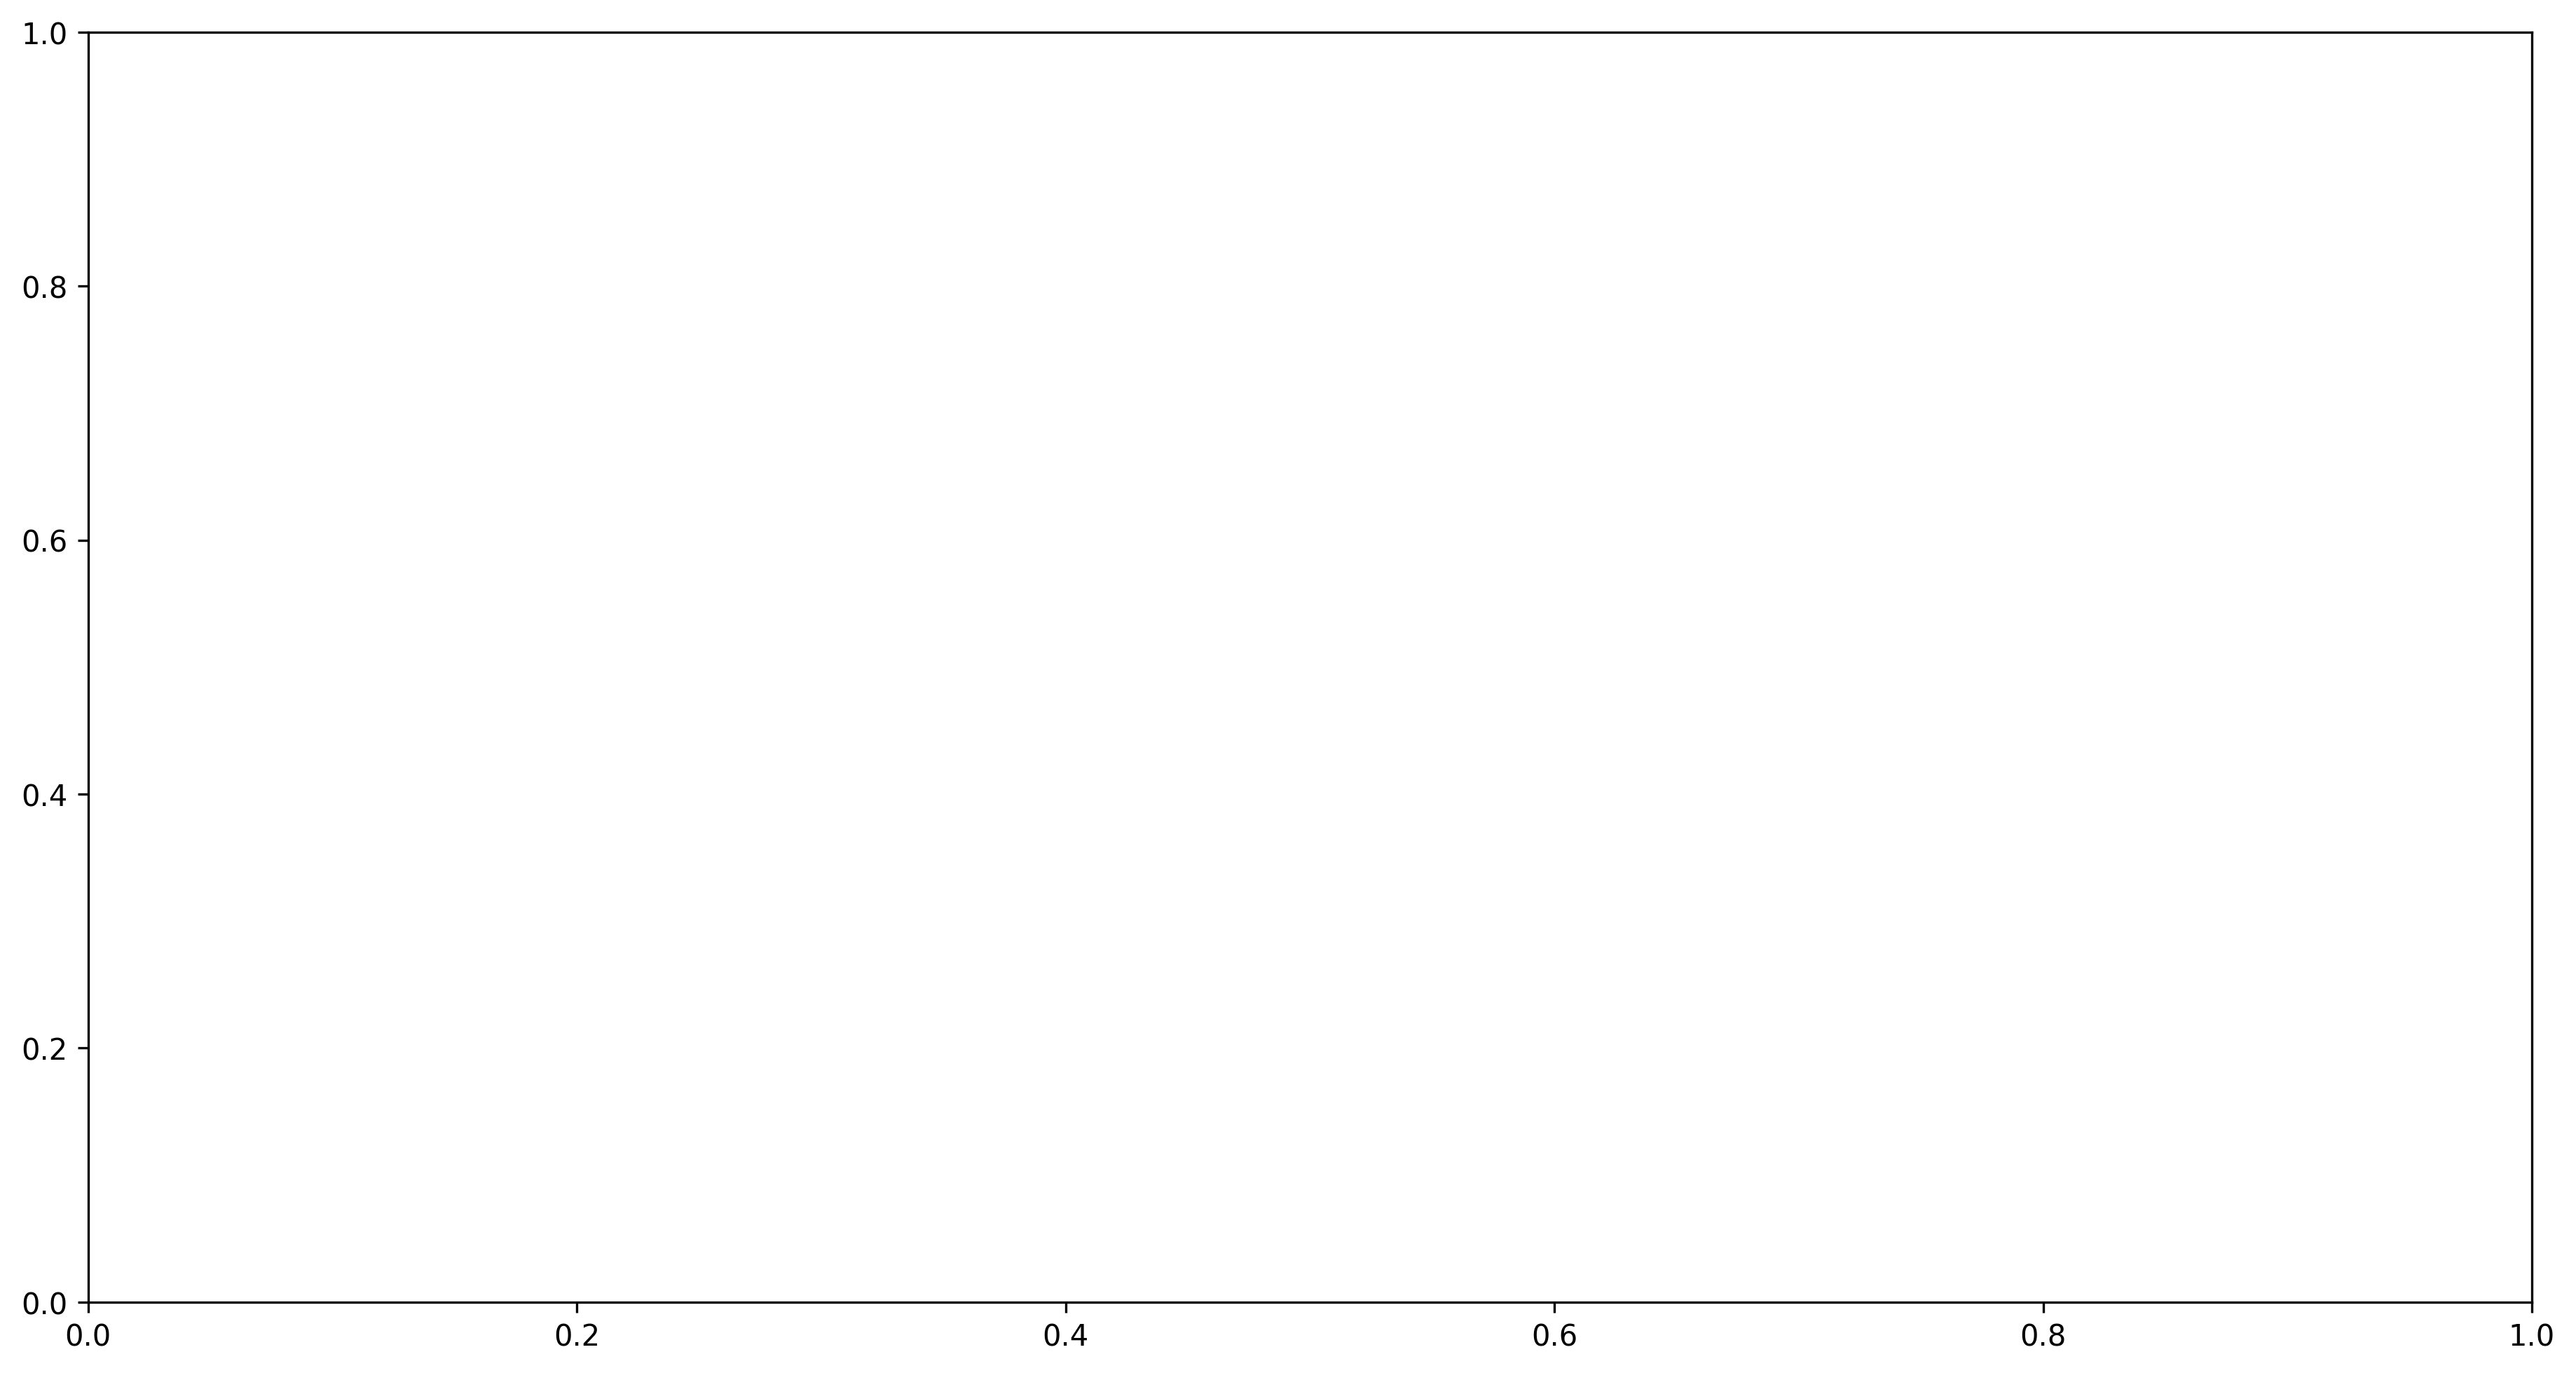

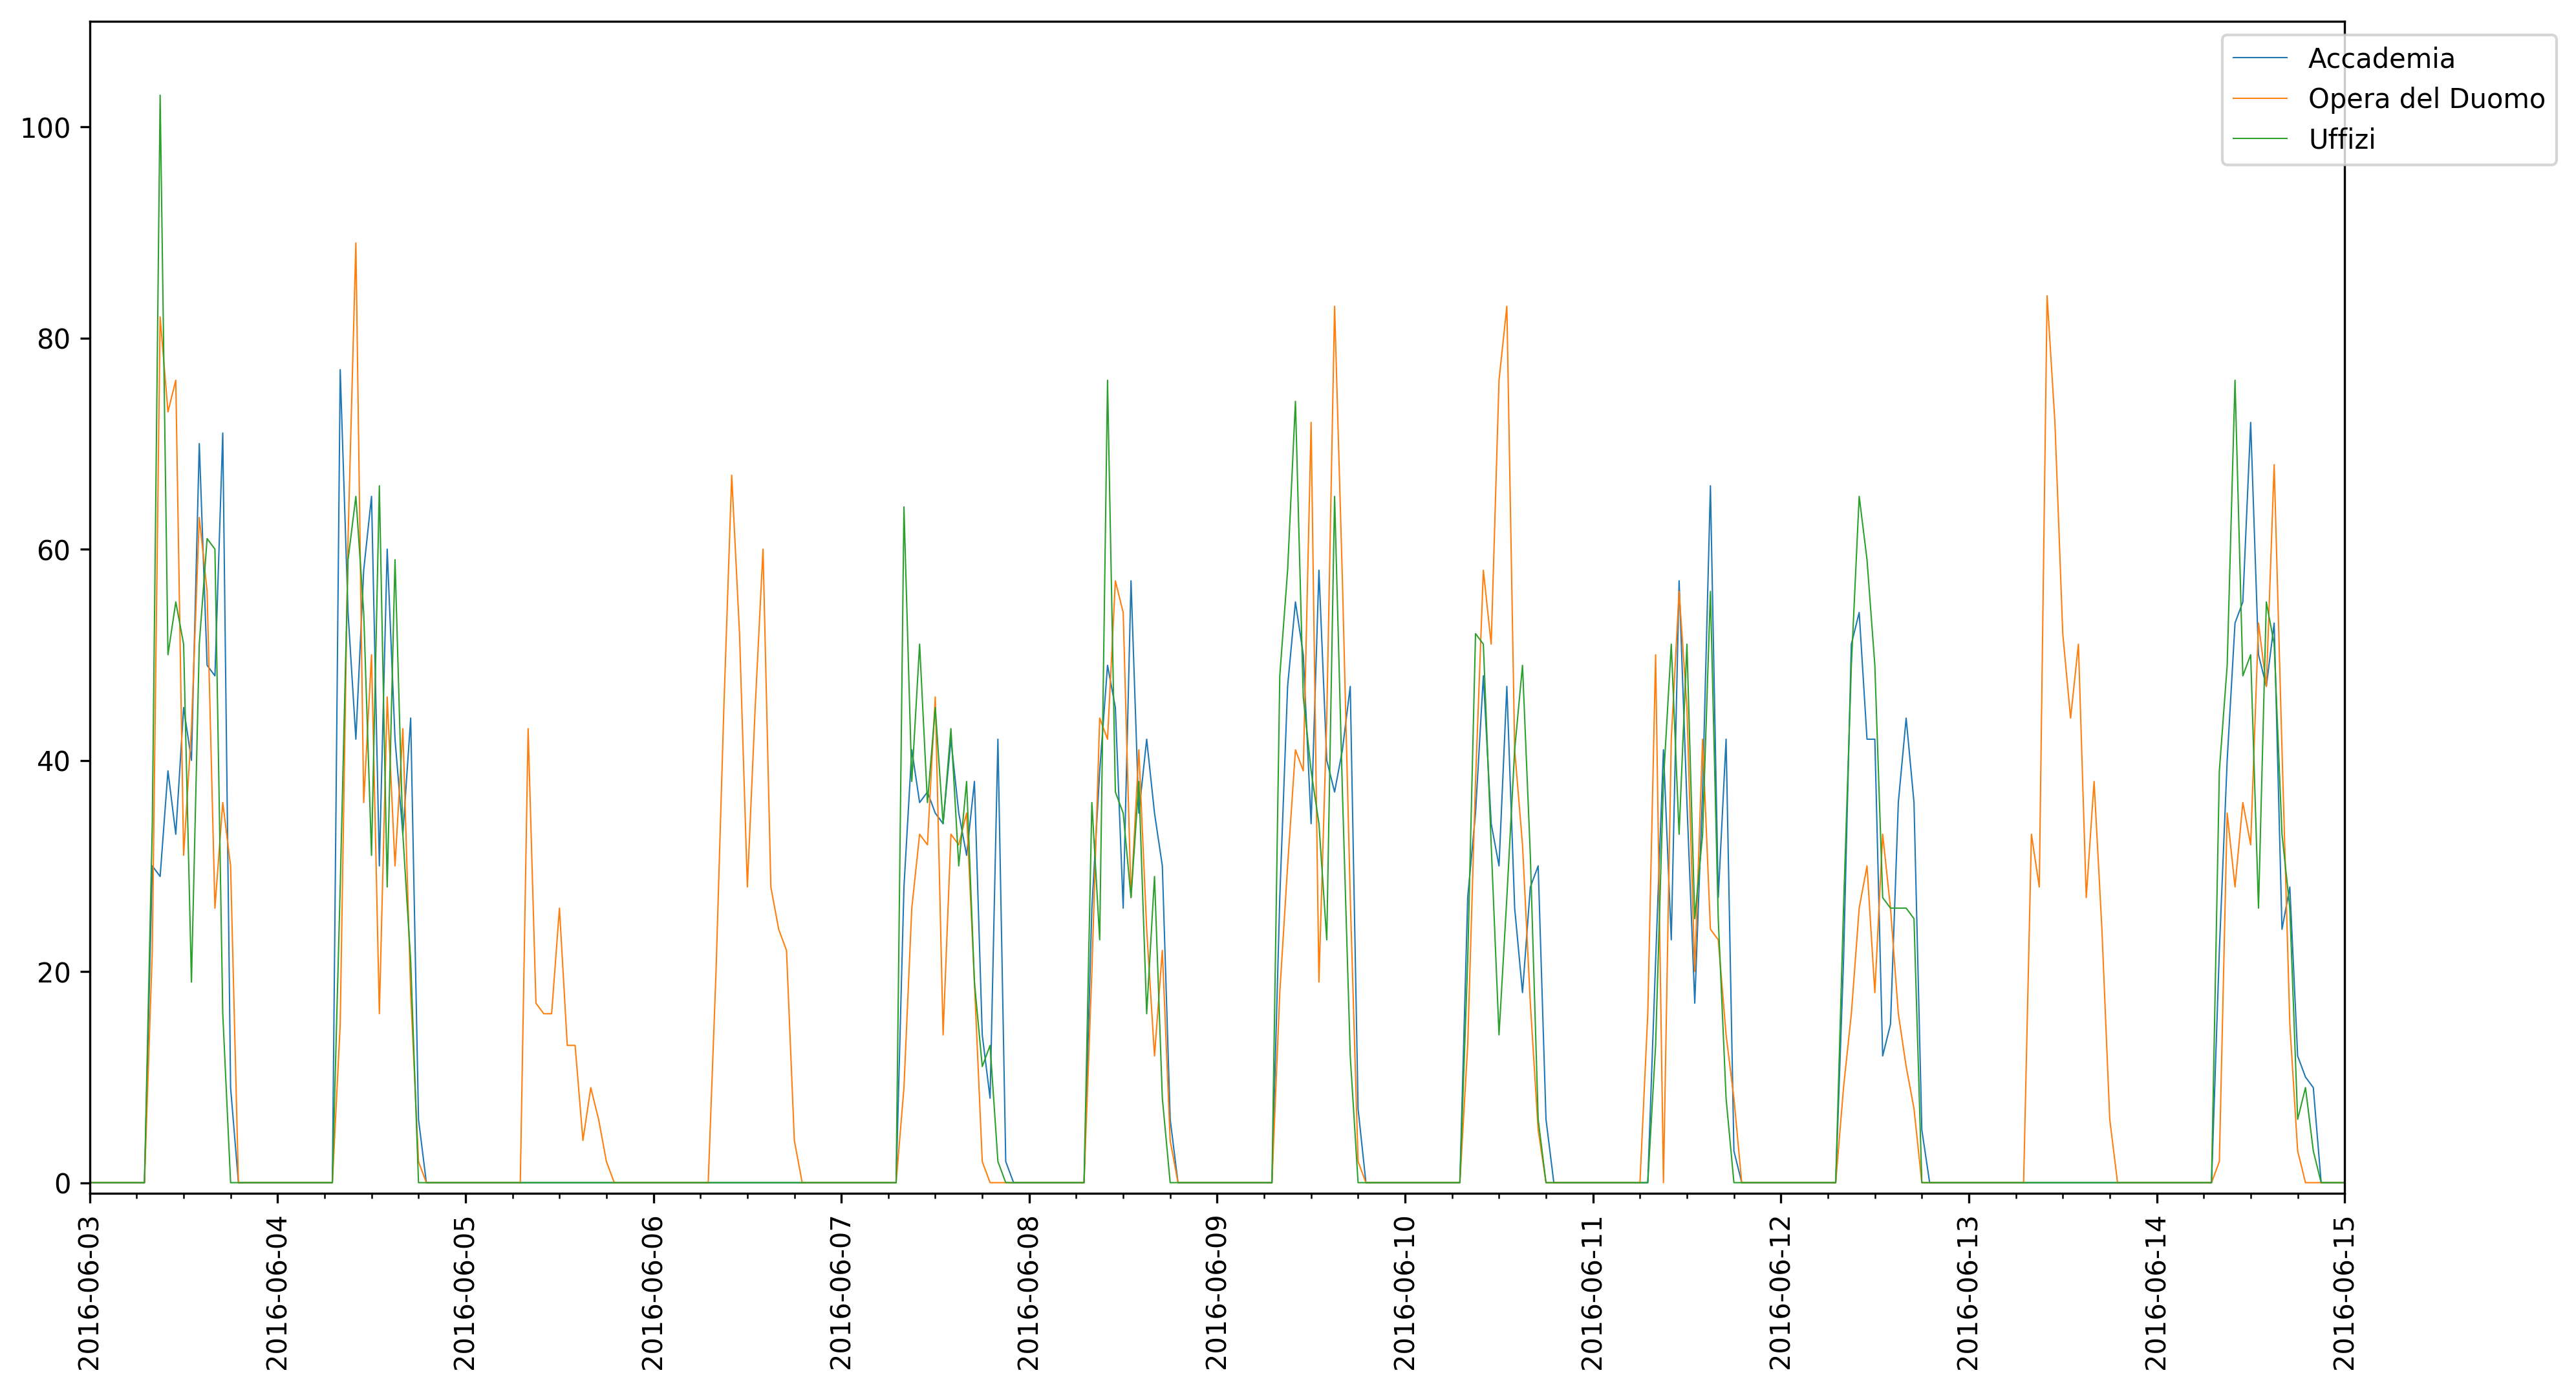

In [19]:
df1.columns = ['short_name','hour','total_people']
time_series_full_plot(df1)

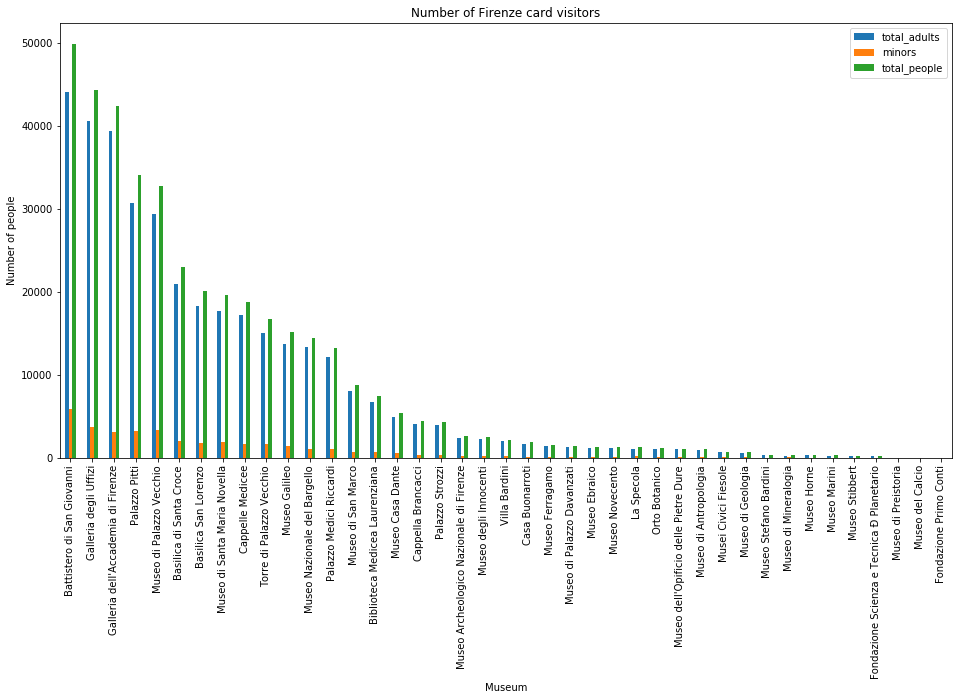

In [7]:
plot_frequencies_total(df)

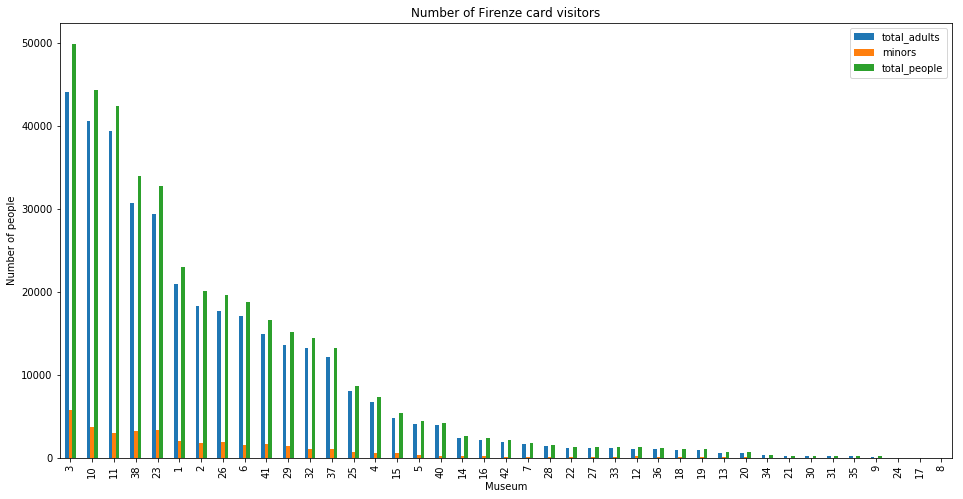

In [8]:
df2 = df.groupby('museum_id').sum()[
    ['total_adults', 'minors']]  # Take only these two columns. Could use df1, but might as well go back to df.
df2['total_people'] = df2['total_adults'] + df2[
    'minors']  # Again, add them. Note that we don't delete these columns, so they will be plotted as well.
df2.sort_values('total_people', inplace=True, ascending=False)  # Sort the values for easy viewing
df2.plot.bar(figsize=(16, 8))
plt.title('Number of Firenze card visitors')
plt.xlabel('Museum')
plt.ylabel('Number of people')
# plt.yscale('log')
plt.show()